In [1]:
import qiskit
import numpy as np, matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.onequbit, qtm.nqubit

In [2]:
num_qubits = 3
num_layers = 2
phis = np.random.uniform(low = 0, high = 2*np.pi, size = 2**num_qubits)
phis = phis / np.linalg.norm(phis)

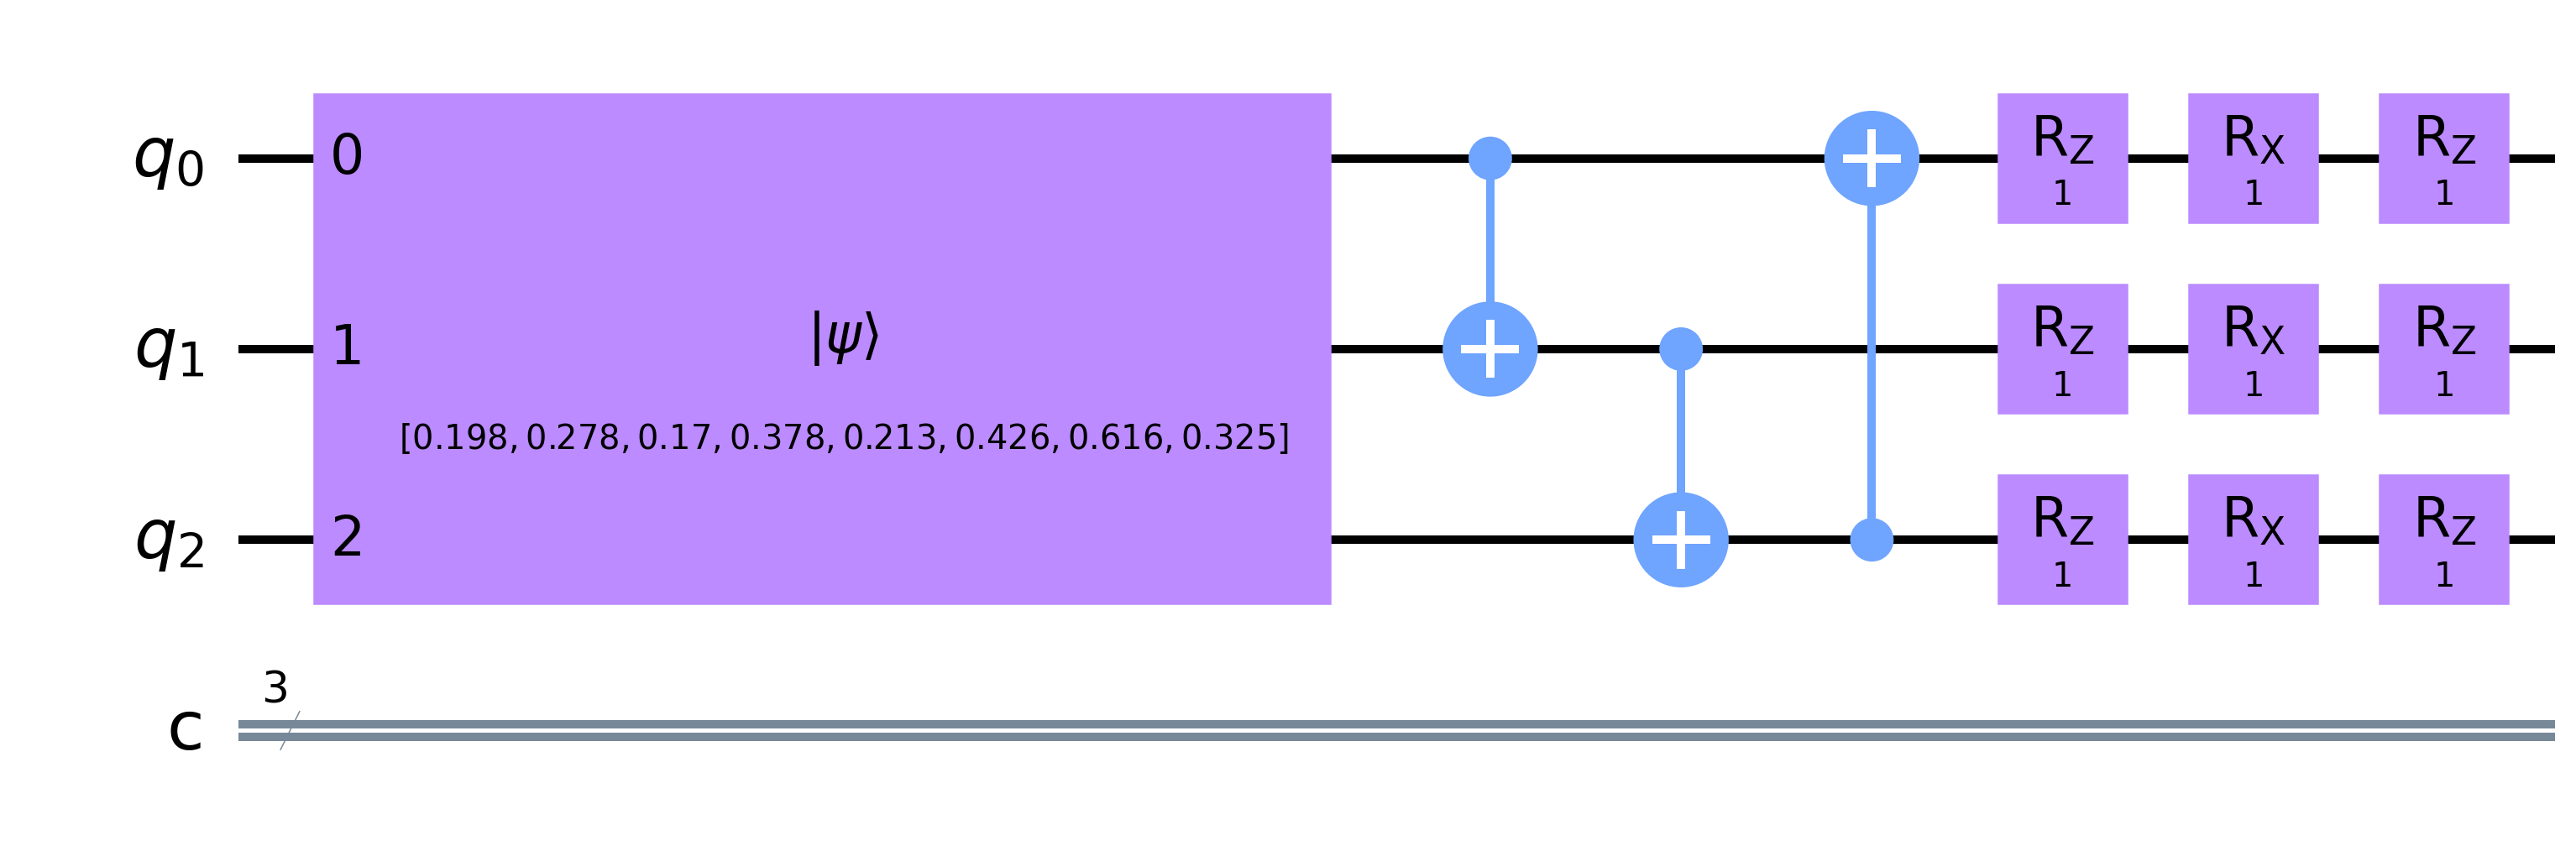

In [9]:
thetas = np.ones((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc.initialize(phis)
qc = qtm.nqubit.u_cluster_nlayer_nqubit(qc, thetas, 1)
qc.draw('mpl', filename = 'circuit.eps', scale = 5)

In [4]:
thetas = np.ones((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc.initialize(phis)

thetass_sgd, loss_values_sgd = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.sgd,
    verbose = 2,
    is_return_all_thetas = True,
    num_layers = num_layers
)

Step 0: 0.38160000000000005
Step 10: 0.2439
Step 20: 0.22609999999999997
Step 30: 0.20699999999999996
Step 40: 0.1986
Step 50: 0.18620000000000003
Step 60: 0.1654
Step 70: 0.1583
Step 80: 0.14059999999999995
Step 90: 0.1321


In [5]:
thetas = np.ones((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc.initialize(phis)

thetass_adam, loss_values_adam = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.adam,
    verbose = 1,
    is_return_all_thetas = True,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [05:26<00:00,  3.26s/it]


In [6]:
thetas = np.ones((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc.initialize(phis)

thetass_qng, loss_values_qng = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.qng_qfim,
    verbose = 1,
    is_return_all_thetas=True
    num_layers = num_layers
)

SyntaxError: invalid syntax (3432822125.py, line 13)

In [7]:
thetas = np.ones((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc.initialize(phis)

thetass_qng_adam, loss_values_qng_adam = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.qng_adam,
    verbose = 1,
    is_return_all_thetas=True
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [05:43<00:00,  3.43s/it]


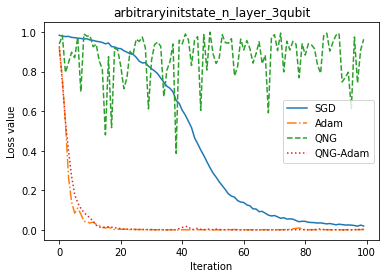

In [8]:
plt.plot(loss_values_sgd, label='SGD', linestyle = '-')
plt.plot(loss_values_adam, label='Adam', linestyle = '-.')
plt.plot(loss_values_qng, label='QNG', linestyle = '--')
plt.plot(loss_values_qng_adam, label='QNG-Adam', linestyle = ':')
plt.title('arbitraryinitstate_n_layer_3qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('arbitraryinitstate_n_layer_3qubit.png', format='png', dpi=600)
plt.show() 